Using device: cpu
X_train shape: (499, 504)
X_test shape: (125, 504)
y_train shape: (499, 9)
y_test shape: (125, 9)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 7, 54, 32)           │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 27, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 27, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2592)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         331,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,385 (1.27 MB)

 Trainable params: 333,385 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4040 - loss: 1.9763 - val_accuracy: 0.4720 - val_loss: 1.7267
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5139 - loss: 1.4702 - val_accuracy: 0.5200 - val_loss: 1.5380
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5918 - loss: 1.2165 - val_accuracy: 0.5680 - val_loss: 1.4120
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6945 - loss: 1.0319 - val_accuracy: 0.5840 - val_loss: 1.2761
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7310 - loss: 0.8599 - val_accuracy: 0.6240 - val_loss: 1.2055
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7908 - loss: 0.7507 - val_accuracy: 0.6960 - val_loss: 1.0775
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8007 - loss: 0.6434 - val_accuracy: 0.7120 - val_loss: 0.9435
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8657 - loss: 0.5568 - val_accuracy: 0.7440 - v

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8917 - loss: 0.5071 
CNN Test Time: tf.Tensor(0.13694500923156738, shape=(), dtype=float64) seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


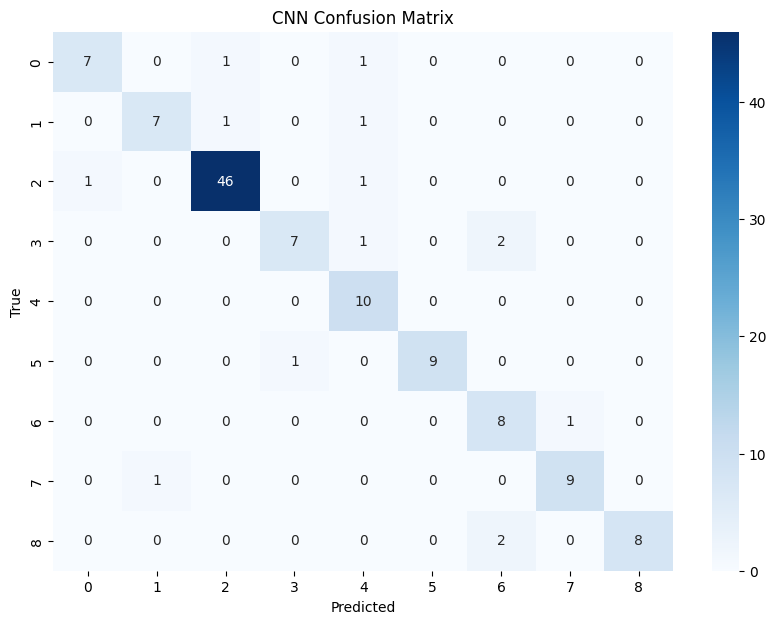

Classification Report:

                precision    recall  f1-score   support

       scracth       0.88      0.78      0.82         9
     notchlong       0.88      0.78      0.82         9
       healthy       0.96      0.96      0.96        48
    notchshort       0.88      0.70      0.78        10
   twocutshort       0.71      1.00      0.83        10
        warped       1.00      0.90      0.95        10
singlecutshort       0.67      0.89      0.76         9
 singlecutlong       0.90      0.90      0.90        10
    twocutlong       1.00      0.80      0.89        10

      accuracy                           0.89       125
     macro avg       0.87      0.86      0.86       125
  weighted avg       0.90      0.89      0.89       125



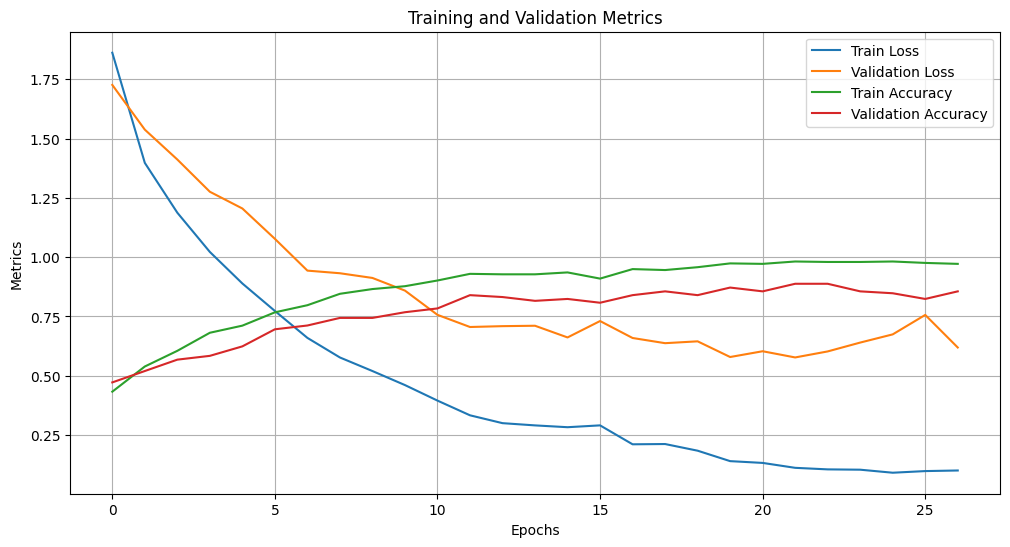

Final Train Loss: 0.10051093250513077
Final Train Accuracy: 0.9719439148902893
Final Validation Loss: 0.6191999912261963
Final Validation Accuracy: 0.8560000061988831
Test Accuracy: 0.8880000114440918


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import torch

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load dataset
data = pd.read_csv("standardized_features_multiclass2.csv")

# Balance the dataset
classes = data['label'].unique()
balanced_data = pd.DataFrame()

for cls in classes:
    class_data = data[data['label'] == cls]
    if len(class_data) < 48:
        class_data = resample(class_data, replace=True, n_samples=48, random_state=42)
    balanced_data = pd.concat([balanced_data, class_data])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split features and labels
X = balanced_data.drop(columns=['label'])
y = balanced_data['label']

# Encode labels
y_encoded, label_mapping = pd.factorize(y)
y_one_hot = to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, stratify=y_encoded, random_state=42)

# Print shapes of data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Calculate appropriate reshaping dimensions
n_samples, n_features = X_train.shape
n_timesteps = 9  # Adjusted timesteps to match 504 features
n_features_per_timestep = n_features // n_timesteps

# Reshape data for CNN
if n_features % n_timesteps != 0:
    raise ValueError("Number of features cannot be evenly divided into timesteps. Adjust the number of timesteps.")

X_train_cnn = X_train.values.reshape((X_train.shape[0], n_timesteps, n_features_per_timestep, 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], n_timesteps, n_features_per_timestep, 1))

# CNN Model
def build_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(n_timesteps, n_features_per_timestep, 1)),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(y_one_hot.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = build_cnn()
cnn_model.summary()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train CNN
cnn_history = cnn_model.fit(
    X_train_cnn, y_train,
    validation_data=(X_test_cnn, y_test),
    epochs=30, batch_size=32,
    callbacks=[early_stopping]
)

# Save the model
cnn_model.save("cnn_model.h5")

# Evaluate CNN
cnn_test_time_start = tf.timestamp()
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test_cnn, y_test)
cnn_test_time_end = tf.timestamp()
print("CNN Test Time:", cnn_test_time_end - cnn_test_time_start, "seconds")

# Confusion Matrix for CNN
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
y_true_cnn = np.argmax(y_test, axis=1)
cnn_cm = confusion_matrix(y_true_cnn, y_pred_cnn_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues')
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_true_cnn, y_pred_cnn_classes, target_names=label_mapping))

# Plot training loss and accuracy
plt.figure(figsize=(12, 6))
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()

# Print performance metrics
print("Final Train Loss:", cnn_history.history['loss'][-1])
print("Final Train Accuracy:", cnn_history.history['accuracy'][-1])
print("Final Validation Loss:", cnn_history.history['val_loss'][-1])
print("Final Validation Accuracy:", cnn_history.history['val_accuracy'][-1])

# Print test accuracy explicitly
print("Test Accuracy:", cnn_test_acc)

Using device: cpu
X_train shape: (499, 504)
X_test shape: (125, 504)
y_train shape: (499, 9)
y_test shape: (125, 9)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 9, 64)               │          30,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 9, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,481 (287.04 KB)

 Trainable params: 73,481 (287.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.3052 - loss: 2.0903 - val_accuracy: 0.4320 - val_loss: 1.9506
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4327 - loss: 1.7454 - val_accuracy: 0.4560 - val_loss: 1.7717
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5428 - loss: 1.5045 - val_accuracy: 0.4800 - val_loss: 1.6864
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5490 - loss: 1.3769 - val_accuracy: 0.4560 - val_loss: 1.6311
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6291 - loss: 1.1751 - val_accuracy: 0.4800 - val_loss: 1.5592
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6153 - loss: 1.1613 - val_accuracy: 0.4880 - val_loss: 1.4905
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6246 - loss: 1.0688 - val_accuracy: 0.5200 - val_loss: 1.3831
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6734 - loss: 0.9718 - val_accuracy: 0.5440 - v

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8390 - loss: 0.6462 
LSTM Test Time: tf.Tensor(0.11369204521179199, shape=(), dtype=float64) seconds
LSTM Test Accuracy: 0.8320
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


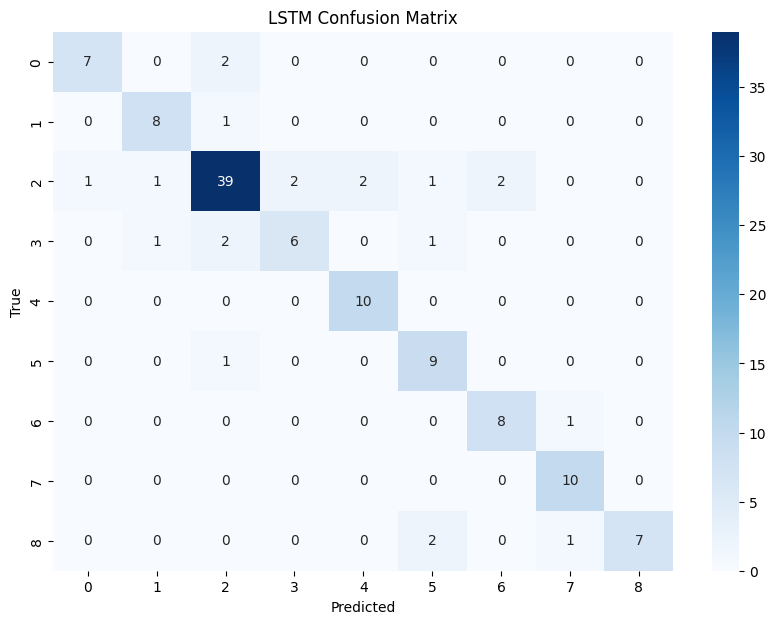

Classification Report:

                precision    recall  f1-score   support

       scracth       0.88      0.78      0.82         9
     notchlong       0.80      0.89      0.84         9
       healthy       0.87      0.81      0.84        48
    notchshort       0.75      0.60      0.67        10
   twocutshort       0.83      1.00      0.91        10
        warped       0.69      0.90      0.78        10
singlecutshort       0.80      0.89      0.84         9
 singlecutlong       0.83      1.00      0.91        10
    twocutlong       1.00      0.70      0.82        10

      accuracy                           0.83       125
     macro avg       0.83      0.84      0.83       125
  weighted avg       0.84      0.83      0.83       125



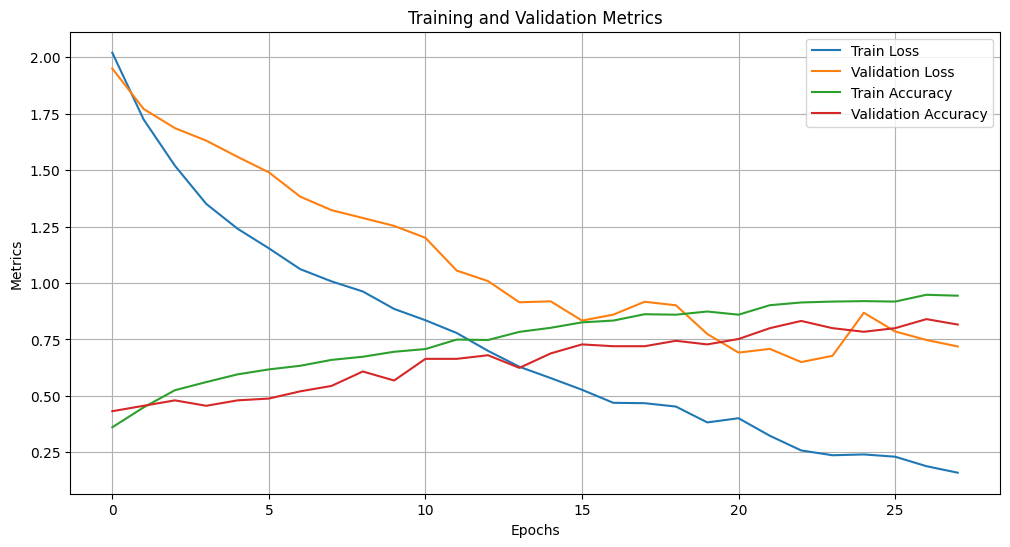

Final Train Loss: 0.15934135019779205
Final Train Accuracy: 0.9438877701759338
Final Validation Loss: 0.7188231348991394
Final Validation Accuracy: 0.8159999847412109
Final Test Accuracy: 0.8320


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import torch

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load dataset
data = pd.read_csv("standardized_features_multiclass2.csv")

# Balance the dataset
classes = data['label'].unique()
balanced_data = pd.DataFrame()

for cls in classes:
    class_data = data[data['label'] == cls]
    if len(class_data) < 48:
        class_data = resample(class_data, replace=True, n_samples=48, random_state=42)
    balanced_data = pd.concat([balanced_data, class_data])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split features and labels
X = balanced_data.drop(columns=['label'])
y = balanced_data['label']

# Encode labels
y_encoded, label_mapping = pd.factorize(y)
y_one_hot = to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, stratify=y_encoded, random_state=42)

# Print shapes of data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Calculate appropriate reshaping dimensions
n_samples, n_features = X_train.shape
n_timesteps = 9  # Adjusted timesteps to match 504 features
n_features_per_timestep = n_features // n_timesteps

# Reshape data for LSTM
if n_features % n_timesteps != 0:
    raise ValueError("Number of features cannot be evenly divided into timesteps. Adjust the number of timesteps.")

X_train_lstm = X_train.values.reshape((X_train.shape[0], n_timesteps, n_features_per_timestep))
X_test_lstm = X_test.values.reshape((X_test.shape[0], n_timesteps, n_features_per_timestep))

# LSTM Model
def build_lstm():
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(n_timesteps, n_features_per_timestep)),
        Dropout(0.3),
        LSTM(64),
        Dense(128, activation='relu'),
        Dense(y_one_hot.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

lstm_model = build_lstm()
lstm_model.summary()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train LSTM
lstm_history = lstm_model.fit(
    X_train_lstm, y_train,
    validation_data=(X_test_lstm, y_test),
    epochs=50, batch_size=32,
    callbacks=[early_stopping]
)

# Save the model
lstm_model.save("lstm_model.h5")

# Evaluate LSTM
lstm_test_time_start = tf.timestamp()
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(X_test_lstm, y_test)
lstm_test_time_end = tf.timestamp()
print("LSTM Test Time:", lstm_test_time_end - lstm_test_time_start, "seconds")
print(f"LSTM Test Accuracy: {lstm_test_acc:.4f}")

# Confusion Matrix for LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)
y_true_lstm = np.argmax(y_test, axis=1)
lstm_cm = confusion_matrix(y_true_lstm, y_pred_lstm_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Blues')
plt.title("LSTM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_true_lstm, y_pred_lstm_classes, target_names=label_mapping))

# Plot training loss and accuracy
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()

# Print performance metrics
print("Final Train Loss:", lstm_history.history['loss'][-1])
print("Final Train Accuracy:", lstm_history.history['accuracy'][-1])
print("Final Validation Loss:", lstm_history.history['val_loss'][-1])
print("Final Validation Accuracy:", lstm_history.history['val_accuracy'][-1])
print(f"Final Test Accuracy: {lstm_test_acc:.4f}")


Evaluating Random Forest...
Random Forest Average Cross-Validation Accuracy: 0.8477
Evaluating SVM...
SVM Average Cross-Validation Accuracy: 0.6393
Evaluating Logistic Regression...
Logistic Regression Average Cross-Validation Accuracy: 0.8076
Evaluating KNN...
KNN Average Cross-Validation Accuracy: 0.5713
Evaluating Decision Tree...
Decision Tree Average Cross-Validation Accuracy: 0.7456
Best model: Random Forest with score: 0.8477
Test Time: 0.0090 seconds


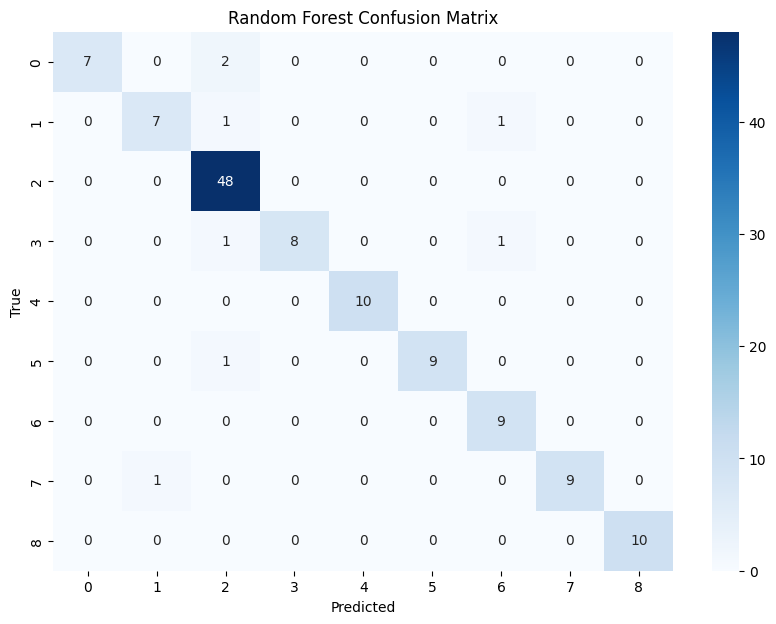

Classification Report:

                precision    recall  f1-score   support

       scracth       1.00      0.78      0.88         9
     notchlong       0.88      0.78      0.82         9
       healthy       0.91      1.00      0.95        48
    notchshort       1.00      0.80      0.89        10
   twocutshort       1.00      1.00      1.00        10
        warped       1.00      0.90      0.95        10
singlecutshort       0.82      1.00      0.90         9
 singlecutlong       1.00      0.90      0.95        10
    twocutlong       1.00      1.00      1.00        10

      accuracy                           0.94       125
     macro avg       0.96      0.91      0.93       125
  weighted avg       0.94      0.94      0.93       125

Final Test Accuracy: 0.9360 (93.60%)

Performance Metrics:
Accuracy: 0.9360 (93.60%)
Test Time: 0.0090 seconds


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("standardized_features_multiclass2.csv")

# Balance the dataset
classes = data['label'].unique()
balanced_data = pd.DataFrame()

for cls in classes:
    class_data = data[data['label'] == cls]
    if len(class_data) < 48:
        class_data = resample(class_data, replace=True, n_samples=48, random_state=42)
    balanced_data = pd.concat([balanced_data, class_data])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split features and labels
X = balanced_data.drop(columns=['label'])
y = balanced_data['label']

# Encode labels
y_encoded, label_mapping = pd.factorize(y)

# Feature extraction function (standardization)
def feature_extraction(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Feature extraction for train data
X_scaled = feature_extraction(X)

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Use Stratified 10-Fold Cross Validation to select the best model
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

best_model = None
best_score = 0
best_model_name = ""

# Stratified 10-Fold Cross Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    fold_scores = []
    for train_index, val_index in kf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model.fit(X_train_fold, y_train_fold)
        fold_score = model.score(X_val_fold, y_val_fold)
        fold_scores.append(fold_score)

    avg_score = np.mean(fold_scores)
    print(f"{model_name} Average Cross-Validation Accuracy: {avg_score:.4f}")

    if avg_score > best_score:
        best_score = avg_score
        best_model = model
        best_model_name = model_name

print(f"Best model: {best_model_name} with score: {best_score:.4f}")

# Train the best model
best_model.fit(X_train, y_train)

# Save the best model
model_filename = "best_ml_model.pkl"
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

# Evaluate the model on the test set
test_time_start = time.time()
y_pred = best_model.predict(X_test)
test_time_end = time.time()
test_time = test_time_end - test_time_start
print(f"Test Time: {test_time:.4f} seconds")

# Confusion Matrix for the test set
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"{best_model_name} Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_mapping))

# Print performance metrics
accuracy = np.mean(y_pred == y_test)
print(f"Final Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Performance Metrics - Final Test
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Test Time: {test_time:.4f} seconds")

# Save model and performance
performance = {
    'test_accuracy': accuracy,
    'test_time': test_time
}

# You can save the performance metrics as a pickle file or text file if necessary.
with open("model_performance.pkl", 'wb') as f:
    pickle.dump(performance, f)


In [ ]:
#b-8

Evaluating Random Forest for Binary Classification...
Best Cross-Validation Accuracy for Random Forest: 0.9440
Evaluating SVM for Binary Classification...
Best Cross-Validation Accuracy for SVM: 0.9017
Evaluating Logistic Regression for Binary Classification...
Best Cross-Validation Accuracy for Logistic Regression: 0.8317
Evaluating KNN for Binary Classification...
Best Cross-Validation Accuracy for KNN: 0.8619
Evaluating Decision Tree for Binary Classification...
Best Cross-Validation Accuracy for Decision Tree: 0.8698
Best Binary Classification model: Random Forest with score: 0.9440
Test Time (Binary Classification): 0.0159 seconds


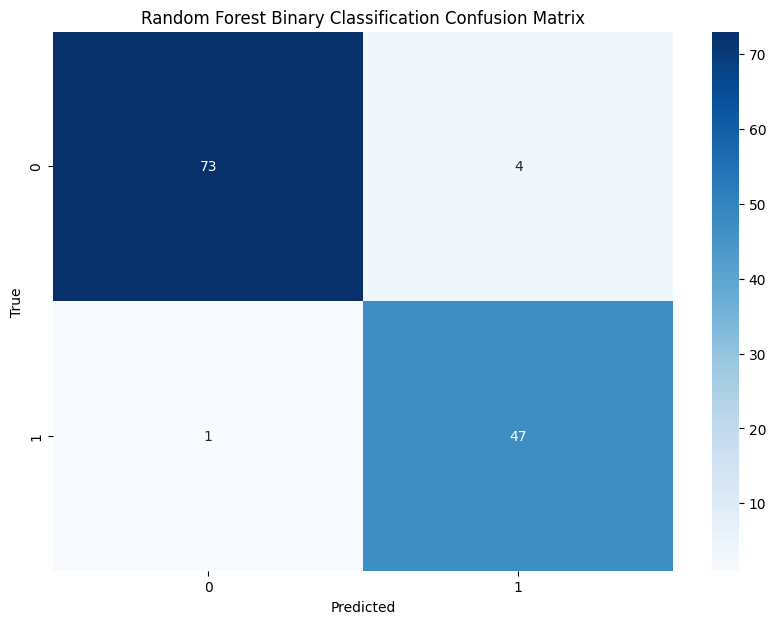

Binary Classification Classification Report:

              precision    recall  f1-score   support

 Non-Healthy       0.99      0.95      0.97        77
     Healthy       0.92      0.98      0.95        48

    accuracy                           0.96       125
   macro avg       0.95      0.96      0.96       125
weighted avg       0.96      0.96      0.96       125

Evaluating Random Forest for Multi-Class Classification...
Best Cross-Validation Accuracy for Random Forest: 0.8215
Evaluating SVM for Multi-Class Classification...
Best Cross-Validation Accuracy for SVM: 0.7923
Evaluating Logistic Regression for Multi-Class Classification...
Best Cross-Validation Accuracy for Logistic Regression: 0.7566
Evaluating KNN for Multi-Class Classification...
Best Cross-Validation Accuracy for KNN: 0.7595
Evaluating Decision Tree for Multi-Class Classification...
Best Cross-Validation Accuracy for Decision Tree: 0.7601
Best Multi-Class Classification model: Random Forest with score: 0.8215
Tes

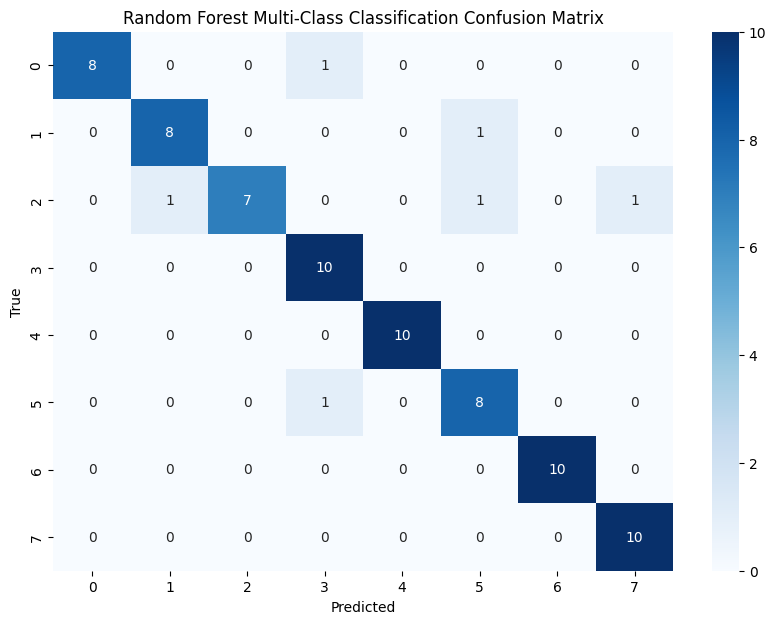

Multi-Class Classification Classification Report:

                precision    recall  f1-score   support

       scracth       1.00      0.89      0.94         9
     notchlong       0.89      0.89      0.89         9
    notchshort       1.00      0.70      0.82        10
   twocutshort       0.83      1.00      0.91        10
        warped       1.00      1.00      1.00        10
singlecutshort       0.80      0.89      0.84         9
 singlecutlong       1.00      1.00      1.00        10
    twocutlong       0.91      1.00      0.95        10

      accuracy                           0.92        77
     macro avg       0.93      0.92      0.92        77
  weighted avg       0.93      0.92      0.92        77

Final Multi-Class Test Accuracy: 0.9221 (92.21%)

Multi-Class Performance Metrics:
Accuracy: 0.9221 (92.21%)
Test Time: 0.0173 seconds


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("standardized_features_multiclass2.csv")

# Balance the dataset
classes = data['label'].unique()
balanced_data = pd.DataFrame()

for cls in classes:
    class_data = data[data['label'] == cls]
    if len(class_data) < 48:
        class_data = resample(class_data, replace=True, n_samples=48, random_state=42)
    balanced_data = pd.concat([balanced_data, class_data])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split features and labels
X = balanced_data.drop(columns=['label'])
y = balanced_data['label']

# Binary classification: Healthy vs Non-Healthy
y_binary = np.where(y == 'healthy', 1, 0)  # 1 = Healthy, 0 = Non-Healthy

# Feature extraction function (standardization)
def feature_extraction(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Feature extraction for train data
X_scaled = feature_extraction(X)

# Split data 80% train, 20% test for binary classification
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X_scaled, y_binary, test_size=0.2, stratify=y_binary, random_state=42)

# Define models and hyperparameters for Grid Search (binary classification)
models = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=500, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['liblinear']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    }
}

# Best model for binary classification and its score
best_model_binary = None
best_score_binary = 0
best_model_name_binary = ""

# Stratified 10-Fold Cross Validation with Grid Search for binary classification
for model_name, model_info in models.items():
    print(f"Evaluating {model_name} for Binary Classification...")
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), n_jobs=-1)

    grid_search.fit(X_train, y_train_binary)
    best_score_for_model = grid_search.best_score_
    print(f"Best Cross-Validation Accuracy for {model_name}: {best_score_for_model:.4f}")

    if best_score_for_model > best_score_binary:
        best_score_binary = best_score_for_model
        best_model_binary = grid_search.best_estimator_
        best_model_name_binary = model_name

print(f"Best Binary Classification model: {best_model_name_binary} with score: {best_score_binary:.4f}")

# Train the best model for binary classification
best_model_binary.fit(X_train, y_train_binary)

# Save the best binary classification model
model_filename_binary = "best_binary_classification_model.pkl"
with open(model_filename_binary, 'wb') as f:
    pickle.dump(best_model_binary, f)

# Evaluate the best model on the test set (binary classification)
test_time_start = time.time()
y_pred_binary = best_model_binary.predict(X_test)
test_time_end = time.time()
test_time_binary = test_time_end - test_time_start
print(f"Test Time (Binary Classification): {test_time_binary:.4f} seconds")

# Confusion Matrix for the test set (binary classification)
cm_binary = confusion_matrix(y_test_binary, y_pred_binary)

# Plot confusion matrix as heatmap (binary classification)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Blues')
plt.title(f"{best_model_name_binary} Binary Classification Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report for binary classification
print("Binary Classification Classification Report:\n")
print(classification_report(y_test_binary, y_pred_binary, target_names=['Non-Healthy', 'Healthy']))

# Multi-class Classification: Now focusing on the 8 non-healthy classes (excluding 'healthy')

# Create multi-class target for non-healthy classes (excluding 'healthy')
y_multi = y[y != 'healthy']  # Exclude 'healthy'
X_multi = X_scaled[y != 'healthy']  # Also exclude corresponding rows in X
y_encoded_multi, label_mapping_multi = pd.factorize(y_multi)

# Split data for multi-class classification (excluding 'healthy')
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_encoded_multi, test_size=0.2, stratify=y_encoded_multi, random_state=42)

# Define models and hyperparameters for Grid Search (multi-class classification)
best_model_multi = None
best_score_multi = 0
best_model_name_multi = ""

# Grid Search for Multi-class classification
for model_name, model_info in models.items():
    print(f"Evaluating {model_name} for Multi-Class Classification...")
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), n_jobs=-1)

    grid_search.fit(X_train_multi, y_train_multi)
    best_score_for_model = grid_search.best_score_
    print(f"Best Cross-Validation Accuracy for {model_name}: {best_score_for_model:.4f}")

    if best_score_for_model > best_score_multi:
        best_score_multi = best_score_for_model
        best_model_multi = grid_search.best_estimator_
        best_model_name_multi = model_name

print(f"Best Multi-Class Classification model: {best_model_name_multi} with score: {best_score_multi:.4f}")

# Train the best model for multi-class classification
best_model_multi.fit(X_train_multi, y_train_multi)

# Save the best multi-class model
model_filename_multi = "best_multi_classification_model.pkl"
with open(model_filename_multi, 'wb') as f:
    pickle.dump(best_model_multi, f)

# Evaluate the best model on the test set (multi-class classification)
test_time_start = time.time()
y_pred_multi = best_model_multi.predict(X_test_multi)
test_time_end = time.time()
test_time_multi = test_time_end - test_time_start
print(f"Test Time (Multi-Class Classification): {test_time_multi:.4f} seconds")

# Confusion Matrix for the test set (multi-class classification)
cm_multi = confusion_matrix(y_test_multi, y_pred_multi)

# Plot confusion matrix as heatmap (multi-class classification)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues')
plt.title(f"{best_model_name_multi} Multi-Class Classification Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report for multi-class classification
print("Multi-Class Classification Classification Report:\n")
print(classification_report(y_test_multi, y_pred_multi, target_names=label_mapping_multi))

# Print performance metrics for multi-class classification
accuracy_multi = np.mean(y_pred_multi == y_test_multi)
print(f"Final Multi-Class Test Accuracy: {accuracy_multi:.4f} ({accuracy_multi*100:.2f}%)")

# Performance Metrics for Multi-Class Classification
print("\nMulti-Class Performance Metrics:")
print(f"Accuracy: {accuracy_multi:.4f} ({accuracy_multi*100:.2f}%)")
print(f"Test Time: {test_time_multi:.4f} seconds")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 502, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 251, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 249, 64)             │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 124, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7936)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         507,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 520,641 (1.99 MB)

 Trainable params: 520,641 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.5934 - loss: 0.6956 - val_accuracy: 0.6640 - val_loss: 0.5647
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.6884 - loss: 0.5557 - val_accuracy: 0.6400 - val_loss: 0.5510
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6911 - loss: 0.5050 - val_accuracy: 0.7200 - val_loss: 0.5160
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7949 - loss: 0.4308 - val_accuracy: 0.7200 - val_loss: 0.4954
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8541 - loss: 0.3828 - val_accuracy: 0.7360 - val_loss: 0.4717
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8497 - loss: 0.3241 - val_accuracy: 0.8000 - val_loss: 0.4584
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8960 - loss: 0.2821 - val_accuracy: 0.7520 - val_loss: 0.4552
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8504 - loss: 0.3080 - val_accuracy: 0.8000 - v

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Test Time (Binary Classification): 0.3914 seconds


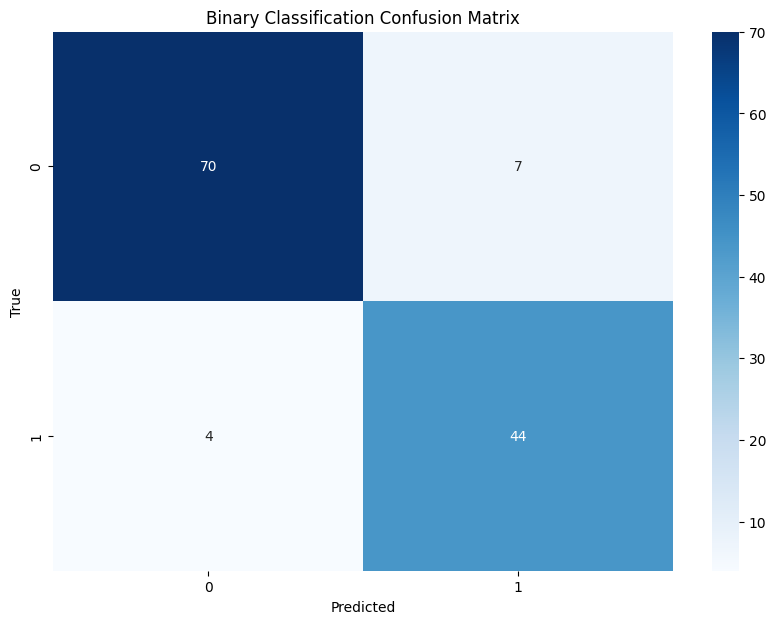

Binary Classification Classification Report:

              precision    recall  f1-score   support

 Non-Healthy       0.95      0.91      0.93        77
     Healthy       0.86      0.92      0.89        48

    accuracy                           0.91       125
   macro avg       0.90      0.91      0.91       125
weighted avg       0.91      0.91      0.91       125



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 502, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 251, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 249, 64)             │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 124, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 7936)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         507,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 521,096 (1.99 MB)

 Trainable params: 521,096 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.2619 - loss: 1.8933 - val_accuracy: 0.4805 - val_loss: 1.5531
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4227 - loss: 1.5020 - val_accuracy: 0.4026 - val_loss: 1.3905
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5847 - loss: 1.2162 - val_accuracy: 0.6364 - val_loss: 1.1582
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6710 - loss: 0.9647 - val_accuracy: 0.6753 - val_loss: 1.0284
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7727 - loss: 0.7805 - val_accuracy: 0.7792 - val_loss: 0.8729
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7827 - loss: 0.7172 - val_accuracy: 0.7532 - val_loss: 0.7998
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8067 - loss: 0.5374 - val_accuracy: 0.8442 - val_loss: 0.6344
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8997 - loss: 0.4027 - val_accuracy: 0.8701 - v

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Test Time (Multi-Class Classification): 0.3558 seconds


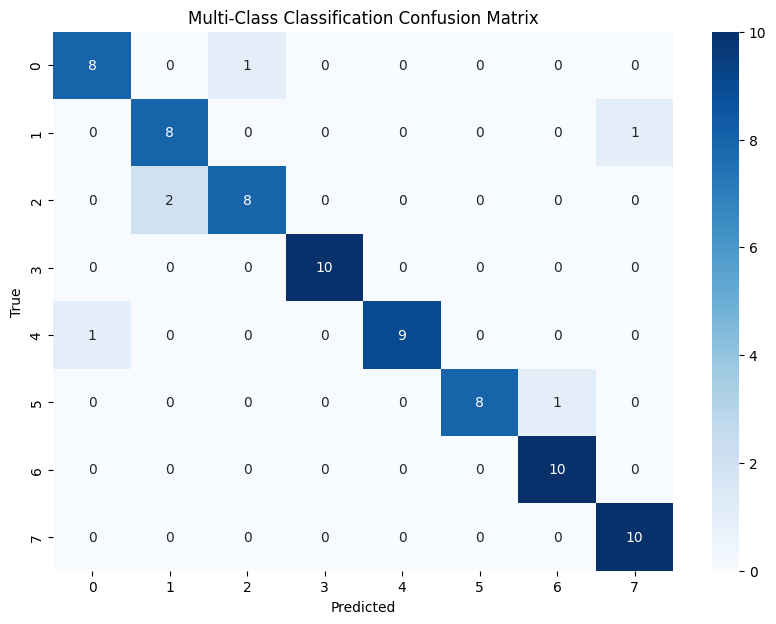

Multi-Class Classification Classification Report:

                precision    recall  f1-score   support

       scracth       0.89      0.89      0.89         9
     notchlong       0.80      0.89      0.84         9
    notchshort       0.89      0.80      0.84        10
   twocutshort       1.00      1.00      1.00        10
        warped       1.00      0.90      0.95        10
singlecutshort       1.00      0.89      0.94         9
 singlecutlong       0.91      1.00      0.95        10
    twocutlong       0.91      1.00      0.95        10

      accuracy                           0.92        77
     macro avg       0.92      0.92      0.92        77
  weighted avg       0.93      0.92      0.92        77

Final Multi-Class Test Accuracy: 0.9221 (92.21%)

Multi-Class Performance Metrics:
Accuracy: 0.9221 (92.21%)
Test Time: 0.3558 seconds


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import pickle
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("standardized_features_multiclass2.csv")

# Balance the dataset
classes = data['label'].unique()
balanced_data = pd.DataFrame()

for cls in classes:
    class_data = data[data['label'] == cls]
    if len(class_data) < 48:
        class_data = resample(class_data, replace=True, n_samples=48, random_state=42)
    balanced_data = pd.concat([balanced_data, class_data])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split features and labels
X = balanced_data.drop(columns=['label'])
y = balanced_data['label']

# Binary classification: Healthy vs Non-Healthy
y_binary = np.where(y == 'healthy', 1, 0)  # 1 = Healthy, 0 = Non-Healthy

# Feature extraction function (standardization)
def feature_extraction(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Feature extraction for train data
X_scaled = feature_extraction(X)

# Reshape data for CNN (1D convolutional input)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split data 80% train, 20% test for binary classification
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X_scaled, y_binary, test_size=0.2, stratify=y_binary, random_state=42)

# CNN Model for Binary Classification
def build_cnn_binary():
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(2),
        Conv1D(64, 3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Early stopping callback for binary classification
early_stopping_binary = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Build and train the CNN for binary classification
cnn_binary_model = build_cnn_binary()
cnn_binary_model.summary()

# Train the CNN for Binary Classification
history_binary = cnn_binary_model.fit(X_train, y_train_binary, validation_data=(X_test, y_test_binary), epochs=30, batch_size=32, callbacks=[early_stopping_binary])

# Save the binary classification model
model_filename_binary = "best_binary_classification_cnn_model.h5"
cnn_binary_model.save(model_filename_binary)

# Evaluate the CNN model for binary classification
test_time_start = time.time()
y_pred_binary = (cnn_binary_model.predict(X_test) > 0.5).astype(int)
test_time_end = time.time()
test_time_binary = test_time_end - test_time_start
print(f"Test Time (Binary Classification): {test_time_binary:.4f} seconds")

# Confusion Matrix for the test set (binary classification)
cm_binary = confusion_matrix(y_test_binary, y_pred_binary)

# Plot confusion matrix as heatmap (binary classification)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Blues')
plt.title(f"Binary Classification Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report for binary classification
print("Binary Classification Classification Report:\n")
print(classification_report(y_test_binary, y_pred_binary, target_names=['Non-Healthy', 'Healthy']))


# Multi-class Classification: Now focusing on the 8 non-healthy classes (excluding 'healthy')

# Create multi-class target for non-healthy classes (excluding 'healthy')
y_multi = y[y != 'healthy']  # Exclude 'healthy'
X_multi = X_scaled[y != 'healthy']  # Also exclude corresponding rows in X
y_encoded_multi, label_mapping_multi = pd.factorize(y_multi)

# Convert labels to one-hot encoding for multi-class classification
y_encoded_multi_one_hot = to_categorical(y_encoded_multi)

# Split data for multi-class classification (excluding 'healthy')
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_encoded_multi_one_hot, test_size=0.2, stratify=y_encoded_multi, random_state=42)

# CNN Model for Multi-Class Classification
def build_cnn_multi():
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=(X_train_multi.shape[1], 1)),
        MaxPooling1D(2),
        Conv1D(64, 3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(len(label_mapping_multi), activation='softmax')  # Adjust output layer size
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Early stopping callback for multi-class classification
early_stopping_multi = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Build and train the CNN for multi-class classification
cnn_multi_model = build_cnn_multi()
cnn_multi_model.summary()

# Train the CNN for Multi-Class Classification
history_multi = cnn_multi_model.fit(X_train_multi, y_train_multi, validation_data=(X_test_multi, y_test_multi), epochs=50, batch_size=32, callbacks=[early_stopping_multi])

# Save the multi-class classification model
model_filename_multi = "best_multi_classification_cnn_model.h5"
cnn_multi_model.save(model_filename_multi)

# Evaluate the CNN model for multi-class classification
test_time_start = time.time()
y_pred_multi = np.argmax(cnn_multi_model.predict(X_test_multi), axis=1)
test_time_end = time.time()
test_time_multi = test_time_end - test_time_start
print(f"Test Time (Multi-Class Classification): {test_time_multi:.4f} seconds")

# Confusion Matrix for the test set (multi-class classification)
cm_multi = confusion_matrix(np.argmax(y_test_multi, axis=1), y_pred_multi)

# Plot confusion matrix as heatmap (multi-class classification)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues')
plt.title(f"Multi-Class Classification Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report for multi-class classification
print("Multi-Class Classification Classification Report:\n")
print(classification_report(np.argmax(y_test_multi, axis=1), y_pred_multi, target_names=label_mapping_multi))

# Print performance metrics for multi-class classification
accuracy_multi = np.mean(y_pred_multi == np.argmax(y_test_multi, axis=1))
print(f"Final Multi-Class Test Accuracy: {accuracy_multi:.4f} ({accuracy_multi*100:.2f}%)")

# Performance Metrics for Multi-Class Classification
print("\nMulti-Class Performance Metrics:")
print(f"Accuracy: {accuracy_multi:.4f} ({accuracy_multi*100:.2f}%)")
print(f"Test Time: {test_time_multi:.4f} seconds")